In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
import model
import train

In [3]:
# and handle in {'Kirillov_Alexey', 'Mad_Andrei'}

In [32]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 19}

In [33]:
common_problems = ['935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '937:A [Olympiad].py',
 '938:A [Word Correction].py',
 '938:B [Run For Your Prize].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py']


common_problems = ['950:A [Left-handers, Right-handers and Ambidexters].py',
 '931:A [Friends Meeting].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '937:A [Olympiad].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '931:B [World Cup].py',
 '935:C [Fifa and Fafa].py',
 '946:C [String Transformation].py',
 '934:B [A Prosperous Lot].py',
 '939:A [Love Triangle].py',
 '934:A [A Compatible Pair].py',
 '940:B [Our Tanya is Crying Out Loud].py']

common_problems = [
    '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '950:B [Intercepted Message].py',
 '935:A [Fafa and his Company].py',
 '938:A [Word Correction].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py',
 '938:B [Run For Your Prize].py',
 '937:A [Olympiad].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '938:C [Constructing Tests].py',
 '940:A [Points on the line].py',
 '937:C [Save Energy!].py',
 '934:B [A Prosperous Lot].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py']


common_problems = ['946:A [Partition].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '935:A [Fafa and his Company].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '929:A [Прокат велосипедов].py',
 '940:A [Points on the line].py',
 '950:B [Intercepted Message].py',
 '938:B [Run For Your Prize].py',
 '946:C [String Transformation].py',
 '946:B [Weird Subtraction Process].py',
 '934:B [A Prosperous Lot].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py',
 '931:C [Laboratory Work].py',
 '934:A [A Compatible Pair].py',
 '937:B [Vile Grasshoppers].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py',
 '939:B [Hamster Farm].py',
 '931:A [Friends Meeting].py',
 '937:A [Olympiad].py']


In [35]:
train_size = 14
train_problems = common_problems[:train_size]
test_problems = common_problems[train_size:]

In [36]:
train_problems

['946:A [Partition].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '935:A [Fafa and his Company].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '929:A [Прокат велосипедов].py',
 '940:A [Points on the line].py',
 '950:B [Intercepted Message].py',
 '938:B [Run For Your Prize].py',
 '946:C [String Transformation].py',
 '946:B [Weird Subtraction Process].py',
 '934:B [A Prosperous Lot].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py']

In [37]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
        if problem in common_problems:
            current[problem] = solution
    
    data[handle] = current

In [38]:
data.keys()

dict_keys(['DASmirnov', 'Mad_Andrei', 'denny_sem'])

In [39]:
# code = """
# x = 10
# y = 12
# x += y
# """

# parsed = ast.parse(code)

In [40]:
# for node in ast.walk(parsed):
#     print(node)

In [41]:
# cls.ast_encoder(parsed)

In [42]:
batch_sampler = train.NameBatcher(data,64, train_problems, test_problems)

In [43]:
# batch_sampler.x[0] = "x"

In [44]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([0, 1, 2]), array([10, 12, 10]))

In [45]:
cls = model.Model(batch_sampler.get_n_classes())

In [50]:
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))

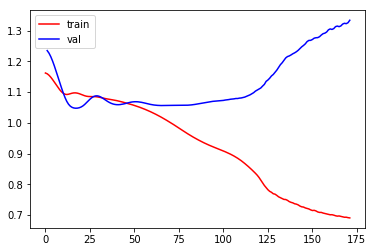

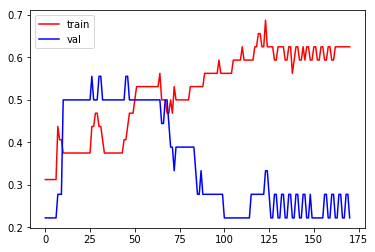

0.6903977


KeyboardInterrupt: 

In [51]:
trainer.train(batch_sampler, {"n_epochs":400})

In [26]:
batch_sampler.get_n_classes()

2

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [46]:
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

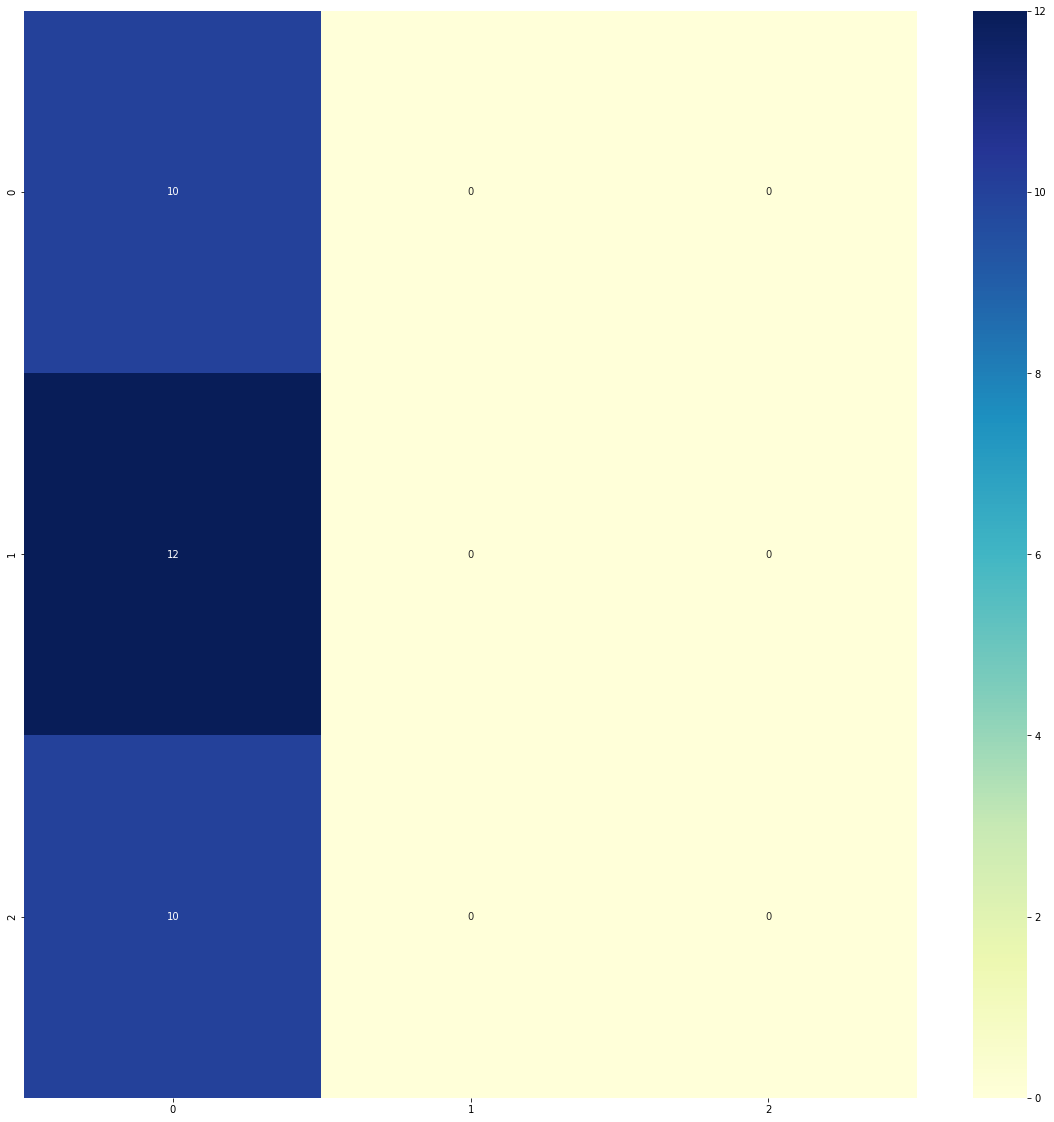

In [47]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [48]:
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

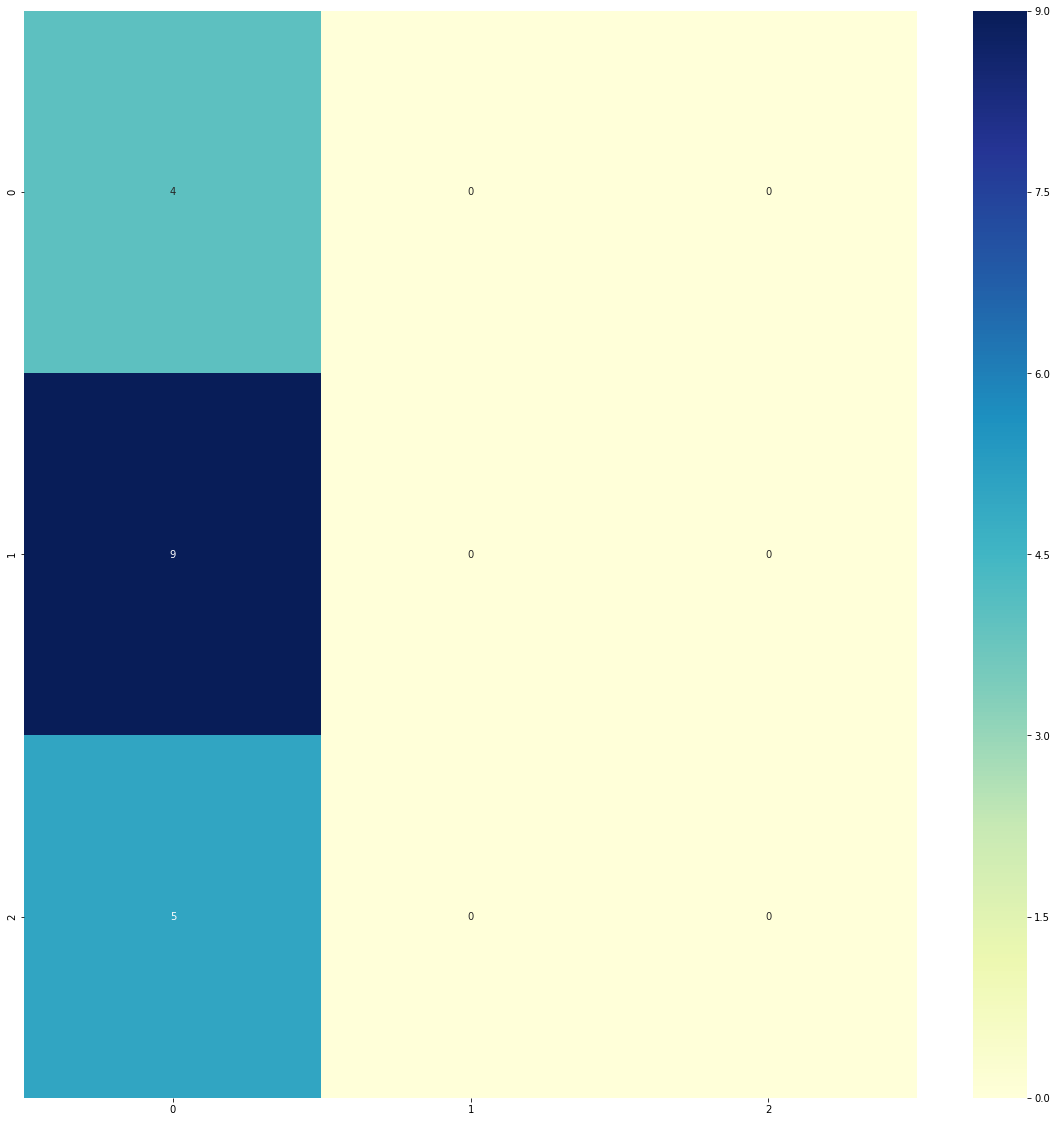

In [49]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [369]:
for code in batch_sampler.x_train:
    print(code)
    print("#######################################\n#############")

n = int(input())
a = set([int(x) for x in input().split()])
count = len(a)
if 0 in a:
    count -= 1
print(count)
#######################################
#############
b = input()
a = input()
c = []
g = 'aeiouy'
c.append(a[0])
for i in range(len(a)-1):
    if a[i] in g and a[i+1] in g:
        pass
    else:
        c.append(a[i+1])



print(''.join(c))


#######################################
#############
def read():
    return list(map(int,input().split()))
l,r,a=read()
if r<l:
    l,r=r,l
if l+a<r:
    print((l+a)*2)
else:
    a-=r-l
    print((r+a//2)*2)


#######################################
#############
n=int(input())
s=list(map(str,input()))
i=1
a=['a', 'e', 'i', 'o', 'u' ,'y']
while i<n:
    if s[i] in a and s[i-1] in a:
        del s[i]
        n-=1
    else:
        i+=1
for i in s:
    print(i,end='')

#######################################
#############
a = input()
b = ''
for i in range(len(a)):
    b = a[i] + b
print(a + b)
#######################################
##

In [394]:
cls.ast_encoder.subtree_network.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[ 1.7906e-02,  1.6490e-02, -4.2106e-02,  ..., -5.6046e-02,
                       -3.7342e-02, -5.7649e-02],
                      [ 4.7855e-02, -3.9626e-02,  3.8272e-02,  ...,  5.5583e-02,
                        7.3345e-02, -8.1834e-02],
                      [-2.0350e-03, -5.6365e-02,  3.2535e-02,  ..., -5.9172e-02,
                       -4.4430e-03,  1.5263e-02],
                      ...,
                      [ 6.1483e-02,  3.5354e-02, -3.4194e-02,  ..., -8.5102e-02,
                       -7.0193e-03, -8.1718e-03],
                      [ 5.9786e-02,  5.0703e-02,  2.4636e-02,  ..., -4.3646e-02,
                       -5.4751e-02,  3.5124e-02],
                      [ 2.3400e-02,  1.6515e-02,  5.8641e-04,  ..., -3.5725e-02,
                        4.0353e-03,  1.7234e-02]])),
             ('weight_hh_l0', tensor(1.00000e-02 *
                     [[-2.8025, -0.1639, -7.7748,  ...,  7.5870,  6.3622, -4.3058],
                   